## Mridangam tonic classification task using Essentia Music Extractor.
From mirdata 0.3.7 documentation, specifically for the mridangam_stroke dataset, we can see that the following annotations are available for each track in the dataset;
TrackID
AuthorName
StrokeName
Tonic
InstanceNum

Since a classification has already been made on StrokeName, this time I am performing it on the Tonic annotation

In [1]:
#If not installed, install Essentia. 
# This cell is for running the notebook in Colab
import importlib.util
if importlib.util.find_spec('essentia') is None:
    !pip install essentia

!pip install mirdata
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 11.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 59.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=1c99e90a11375843ff1010a93aa20a44a5108b892ed072543893943f7bd91816
  Stored in directory: /root/.cache

In [2]:
#Basic imports
import os
import matplotlib.pyplot as plt
import numpy as np

# Imports to support MIR
import mirdata
import essentia.standard as ess
import pandas as pd


## Data processing

We initialize Mridangam stroke a collection of 7162 audio examples of individual strokes of the Mridangam in various tonics. The dataset comprises of 10 different strokes played on Mridangams with 6 different tonic values. 

In this experiment we predict 6 tonic classes, which are;
B	C	C#	D	D#	E ; tagged as ;
Tonic = {B, C, Csh, D, Dsh, E}

(from https://compmusic.upf.edu/mridangam-stroke-dataset)

In [3]:
mridangam = mirdata.initialize("mridangam_stroke")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#This cell downloads and validates the mridangam dataset
mridangam.download()  # download the dataset
#mridangam_stroke.validate()  # validate that all the expected files are there

124MB [04:12, 516kB/s]                           


In [ ]:
mridangam_ids = mridangam.track_ids  # Load Mridangam IDs

'''
mridangam_data is a list of tracks (https://mirdata.readthedocs.io/en/stable/source/mirdata.html#mirdata.datasets.mridangam_stroke.Track)
with variables like stroke_name (the used in the provided example notebook),
tonic (the one I am using now), ecc.
'''
mridangam_data = mridangam.load_tracks()  # Load Mridangam data

mridangam_data[mridangam_ids[0]]  # Visualize a single track

Track(
  audio_path="/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav",
  stroke_name="bheem",
  tonic="B",
  track_id="224030",
  audio: The track's audio

        Returns,
)

In [ ]:
# Get complete list of different TONICS
stroke_tonics = []
for i in mridangam_ids:
    stroke_tonics.append(mridangam_data[i].tonic)
stroke_tonics = np.unique(stroke_tonics)
# converting the list into a set of strings (unordered, with no repetitions -unique data-)
print(stroke_tonics)

['B' 'C' 'C#' 'D' 'D#' 'E']


In [ ]:
# You can create a dictionary using tonics as keys and audio paths as values
tonics_dict = {item: [] for item in stroke_tonics}
for i in mridangam_ids:
    tonics_dict[mridangam_data[i].tonic].append(mridangam_data[i].audio_path)

# tonics_dict['B'] # print example of list of values (audio paths) for the B key
# print(tonics_dict.items())
for key in tonics_dict.keys():
  print(f'Audio paths of files labelled with tonic {key}')
  print(tonics_dict.get(key))

Audio paths of files labelled with tonic B
['/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224031__akshaylaya__bheem-b-002.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224032__akshaylaya__bheem-b-003.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224033__akshaylaya__bheem-b-004.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224034__akshaylaya__bheem-b-005.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224035__akshaylaya__cha-b-001.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224036__akshaylaya__cha-b-002.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224037__akshaylaya__cha-b-003.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224038__akshaylaya__cha-b-004.wav', '/root/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224039__akshaylaya__ch

Plot waveforms of random samples of each tonic type...


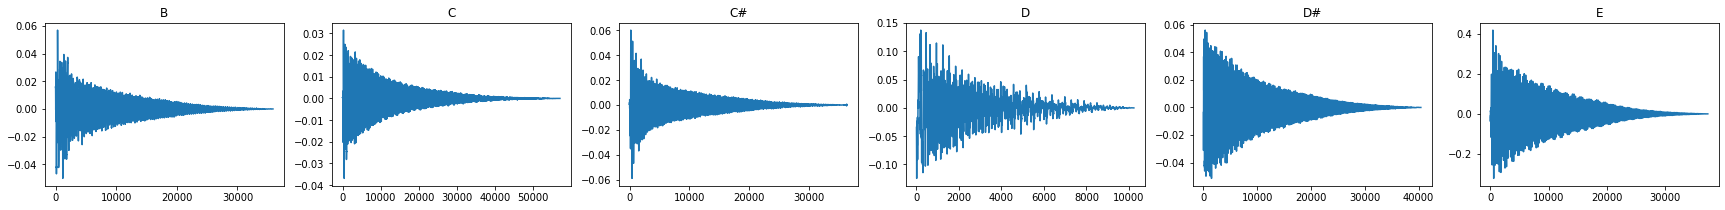

In [ ]:
# Raw-data preprocess analysis parameters
_, fs = mridangam_data[mridangam_ids[0]].audio

num_tonics = len(tonics_dict.keys())
print("Plot waveforms of random samples of each tonic type...")
plt.figure(1, figsize=(5 * num_tonics, 3))
file_ind_inlist = 0 # 0: let's take the first file in the list for sample plots
for i, tonic in enumerate(tonics_dict.keys()):
    sample_file = tonics_dict[tonic][file_ind_inlist]
    x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()
    
    plt.subplot(1,num_tonics,(i+1))
    plt.plot(x)
    plt.title(tonic)

## Preprocessing of raw data: Segmentation, splitting, alignment,... 

While common preprocessing steps (such as amplitude normalisation) exist, there is often some dataset and task specific preprocessing tasks required for grouping, cleaning, and format change. 

In the downloaded dataset, recordings include a sequence of isolated notes played in sequence which could be split into isolated notes. We would like to investigate the option of splitting using a fixed energy threshold (which would help us seperate notes using the silence regions). Let's define a function to perform this operation and visualize some samples to observe the effectiveness of it.

In [ ]:
# Raw-data preprocess analysis parameters
windowSize = 1024
hopSize = 512
NRG_threshold_ratio = 0.005 #threshold expressed as ratio with respect to the maximum value
#Let's put in a container to be able to use as a single argument in function calls
params = {"fs":fs, "windowSize":windowSize, "hopSize":hopSize, "NRG_threshold_ratio": NRG_threshold_ratio}

In [ ]:
#Function definition
def split_file(filename, params):
    '''Function to define split boundaries based on a fixed energy threshold
    '''
    x = ess.MonoLoader(filename = filename, sampleRate = fs)()
    NRG = [];
    #Main windowing and feature extraction loop
    for frame in ess.FrameGenerator(x, frameSize = windowSize, hopSize = hopSize, startFromZero = True):
        NRG.append(ess.Energy()(frame))
    NRG = np.array(NRG)
    NRG = NRG / np.max(NRG)
    
    #Applying energy threshold to decide wave split boundaries
    split_decision_func = np.zeros_like(NRG)
    split_decision_func[NRG > NRG_threshold_ratio] = 1
    #Setting segment boundaries
    #Inserting a zero at the beginning since we will decide the transitions using a diff function
    split_decision_func = np.insert(split_decision_func, 0, 0)
    diff_split_decision = np.diff(split_decision_func)
    #Start indexes: transition from 0 to 1
    start_indexes = np.nonzero(diff_split_decision > 0)[0] * hopSize
    #Stop indexes: transition from 1 to 0
    stop_indexes = np.nonzero(diff_split_decision < 0)[0] * hopSize
    return (x, NRG, split_decision_func, start_indexes, stop_indexes)

Sample plots for waveform versus energy and splits based on energy threshold


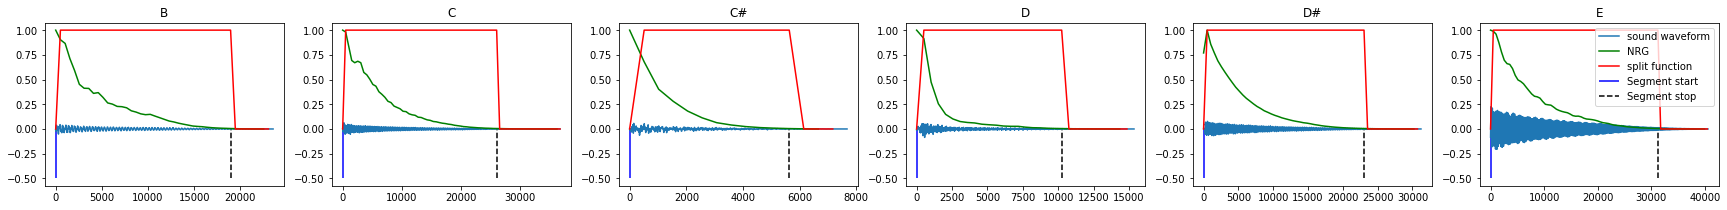

In [ ]:
num_tonics = len(stroke_tonics)
print("Sample plots for waveform versus energy and splits based on energy threshold")

file_indexes = [1]
for file_ind_inlist in file_indexes:
    plt.figure(file_ind_inlist, figsize=(5 * num_tonics, 3))
    for i, stroke in enumerate(tonics_dict.keys()):
        sample_file = tonics_dict[stroke][file_ind_inlist]
        (x, NRG, split_decision_func, start_indexes, stop_indexes) = split_file(sample_file, params)
        #Plotting functions for checking the split decisions
        plt.subplot(1,num_tonics,(i+1))
        plt.title(stroke)
        plt.plot(x, label = 'sound waveform')
        plt.plot(np.arange(NRG.size) * hopSize, NRG, 'g', label = 'NRG')
        plt.plot(np.arange(split_decision_func.size) * hopSize, split_decision_func,'r', label = 'split function')
        plt.vlines(start_indexes, ymin = -0.5, ymax = 0, colors='b', linestyles='solid', label='Segment start')
        plt.vlines(stop_indexes, ymin = -0.5, ymax = 0, colors='k', linestyles='dashed', label='Segment stop')

plt.legend(loc="best");


In [ ]:

main_data_dir = 'sample_data'
if not os.path.exists(main_data_dir): #creating the directory
    os.mkdir(main_data_dir)
segments_dir = os.path.join(main_data_dir,'segments')
if not os.path.exists(segments_dir): #creating the directory
    os.mkdir(segments_dir)

segment_files = []
for tonic, files in tonics_dict.items():
    for sample_file in files:
        #Get file id
        tonic_id =  sample_file.split('__')[-1].split('.')[0]
        x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()
        (x, NRG, split_decision_func, start_indexes, stop_indexes) = split_file(sample_file, params)
        #Croping segments
        for start, stop in zip(start_indexes, stop_indexes):
            x_seg = x[start: stop]
            #Final check for amplitude (to avoid silent segments selection due to noise in split function)
            if(np.max(np.abs(x_seg)) > 0.05):
                #Amplitude normalisation
                x_seg = x_seg / np.max(np.abs(x_seg))
                filename = os.path.join(segments_dir, tonic_id + '.wav')
                ess.MonoWriter(filename = filename, format = 'wav', sampleRate = fs)(x_seg)
                segment_files.append(filename)

print(len(segment_files),'segment files created')

6854 segment files created


In [ ]:
#If required, you can use this cell to delete all files in a given folder
def delete_files_in_dir(dir_name):
    '''Deleting all files in a directory
    '''
    for root, dirs, files in os.walk(dir_name):
        for file in files:
            file_name = os.path.join(root,file)
            os.remove(file_name);print(file_name, 'removed');

#delete_files_in_dir(segments_dir)

## Feature extraction 

Let's compute a list of common features for each of the files and form a data frame including features and categories. We will be using the [MusicExtractor function of Essentia](https://essentia.upf.edu/documentation/reference/std_MusicExtractor.html) that would compute a large number of features commonly used in MIR literature. 

Essentia-MusicExtractor extracts a large number of features. For simplicity, let's only keep low-level descriptors which are represented with a single scalar value as our feature set and discard other features.

In [ ]:
# Print descriptors to be considered
# this time I am changing the essentia.MusicExtractor() parameters in order to try
# to improve the accuracy of my classification, by choosing
# "tonal" features to be extracted
'''
From Essentia's MusicExtractor's docs;

tonal:
    frameSize: 4096
    hopSize: 2048
    zeroPadding: 0
    windowType: blackmanharris62
    silentFrames: noise
    stats: ["mean", "var", "median", "min", "max"]
'''
features, features_frames = ess.MusicExtractor(tonalStats = ["mean", "var", "median", "min", "max"])(mridangam_data['224030'].audio_path)

scalar_tonal_descriptors = [descriptor for descriptor in features.descriptorNames() if 'tonal' in descriptor and isinstance(features[descriptor], float)]
print("Subset of features to be considered:\n",scalar_tonal_descriptors)

Subset of features to be considered:
 ['tonal.chords_changes_rate', 'tonal.chords_number_rate', 'tonal.chords_strength.max', 'tonal.chords_strength.mean', 'tonal.chords_strength.median', 'tonal.chords_strength.min', 'tonal.chords_strength.var', 'tonal.hpcp_crest.max', 'tonal.hpcp_crest.mean', 'tonal.hpcp_crest.median', 'tonal.hpcp_crest.min', 'tonal.hpcp_crest.var', 'tonal.hpcp_entropy.max', 'tonal.hpcp_entropy.mean', 'tonal.hpcp_entropy.median', 'tonal.hpcp_entropy.min', 'tonal.hpcp_entropy.var', 'tonal.key_edma.strength', 'tonal.key_krumhansl.strength', 'tonal.key_temperley.strength', 'tonal.tuning_diatonic_strength', 'tonal.tuning_equal_tempered_deviation', 'tonal.tuning_frequency', 'tonal.tuning_nontempered_energy_ratio']


Running musicextractor for all files, keeping a subset of features, writing to an output file: data.csv

In [ ]:
# Extracting features and writing in data.csv file in the segments folder
#  each line in the data.csv file represents a sample with features and the class information as the last element
data_file = 'sample_data/data.csv'
file_count = 0
with open(data_file, 'w') as writer:
    #adding column names as the first line in csv
    line2write = ','.join(scalar_tonal_descriptors + ['tonic']).replace('tonal.','') + '\n'
    writer.write(line2write)
    for filename in segment_files:
        file_count +=1
        if file_count % 20 == 0: #print name of a file every 20 files
            print(file_count, "files processed, current file: ", filename)

        #Compute and write features for file
        features, features_frames = ess.MusicExtractor(tonalStats = ["mean", "var", "median", "min", "max"])(filename)
        selected_features = [features[descriptor] for descriptor in scalar_tonal_descriptors]
        # the variable "label" holds a string containing the name of the tonic
        # we use str.split() python built-in function to "extract" the string from the audio file name
        # https://docs.python.org/3/library/stdtypes.html?highlight=str%20split#str.split
        # I modified this line in order to format properly the tonic name rather than the stroke name
        label = filename.split('-')[1]
        line2write = str(selected_features)[1:-1] + ',' + label + '\n'
        writer.write(line2write)
print("A total of ", file_count, "files processed")

20 files processed, current file:  sample_data/segments/cha-b-017.wav
40 files processed, current file:  sample_data/segments/cha-b-039.wav
60 files processed, current file:  sample_data/segments/dheem-b-005.wav
80 files processed, current file:  sample_data/segments/dheem-b-026.wav
100 files processed, current file:  sample_data/segments/dheem-b-046.wav
120 files processed, current file:  sample_data/segments/dheem-b-066.wav
140 files processed, current file:  sample_data/segments/dheem-b-095.wav
160 files processed, current file:  sample_data/segments/dheem-b-116.wav
180 files processed, current file:  sample_data/segments/dhin-b-012.wav
200 files processed, current file:  sample_data/segments/dhin-b-040.wav
220 files processed, current file:  sample_data/segments/num-b-013.wav
240 files processed, current file:  sample_data/segments/num-b-037.wav
260 files processed, current file:  sample_data/segments/num-b-061.wav
280 files processed, current file:  sample_data/segments/ta-b-001.w

In [ ]:
#Read data with pandas module
data = pd.read_csv(data_file)

#Plot first lines of our data
data.head()

,chords_changes_rate,chords_number_rate,chords_strength.max,chords_strength.mean,chords_strength.median,chords_strength.min,chords_strength.var,hpcp_crest.max,hpcp_crest.mean,hpcp_crest.median,...,hpcp_entropy.min,hpcp_entropy.var,key_edma.strength,key_krumhansl.strength,key_temperley.strength,tuning_diatonic_strength,tuning_equal_tempered_deviation,tuning_frequency,tuning_nontempered_energy_ratio,tonic
0,0.0,0.071429,0.447176,0.447176,0.447176,0.447176,0.000000e+00,17.848509,13.688197,14.187656,...,1.073985,0.578526,0.617265,0.605408,0.579266,0.418163,0.190164,435.952271,0.783505,b
1,0.0,0.090909,0.463626,0.463626,0.463626,0.463626,0.000000e+00,17.964497,13.578070,17.529263,...,1.072875,0.891260,0.616398,0.604717,0.578948,0.342059,0.225905,434.946167,0.813583,b
2,0.0,0.125000,0.463614,0.463614,0.463614,0.463614,8.881784e-16,17.847248,13.411448,12.557196,...,1.075361,0.160865,0.619288,0.607534,0.581673,0.410444,0.252750,434.946167,0.804092,b
3,0.0,0.071429,0.579307,0.579307,0.579307,0.579307,3.552714e-15,17.782604,11.860773,11.562714,...,1.102663,0.291535,0.587788,0.578079,0.556459,0.433545,0.241954,432.690918,0.892127,b
4,0.0,0.200000,0.415426,0.415426,0.415426,0.415426,0.000000e+00,33.744499,19.634932,17.648977,...,0.367357,0.550065,0.580428,0.571059,0.555848,0.453090,0.184925,440.000000,0.800189,b


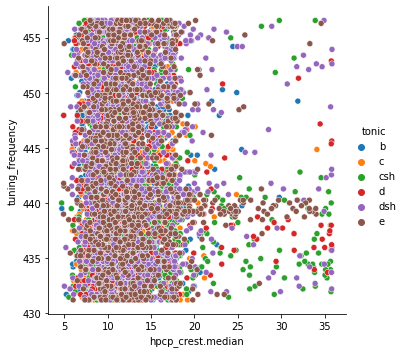

In [ ]:
# Take two random features and plot the sample points
import seaborn as sns
# The features are now TONIC rather than LOW LEVEL, so the plot is changed accordingly
sns.relplot(x = "hpcp_crest.median", y = "tuning_frequency", hue = "tonic", data = data);

### Preprocessing of the features


In [ ]:
data_modif = data.copy()

#Let's use sklearn's preprocessing tools for applying normalisation to features
from sklearn import preprocessing
# Scale everything between 0 and 1 (data normalization)
min_max_scaler = preprocessing.MinMaxScaler()
# The number of features also changes, not 85 anymore, but only 24
data_modif.iloc[:,:24] = min_max_scaler.fit_transform(data.iloc[:,:24].values)

In [ ]:
# Checking if our data is balanced (if not, we should balance it to prevent our model to be baised)
# Balance data, in a classification task, tends to have the same amount of training examples for each label
# https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis
data_modif.tonic.value_counts()

dsh    1456
b      1271
e      1097
csh    1086
c      1079
d       865
Name: tonic, dtype: int64

In [ ]:
# Here we didn't pick the lowest number, 865 for D, which is too small.
# Instead, we choose the 1079 of C
# Label D will be oversampled, C is untouched, all others will be downsampled

# We use pandas.DataFrame.sample()

min_number = data_modif.tonic.value_counts()['c']
print(f'All data will be randomly re-sampled with {min_number} values')

dsh_data = data_modif[data_modif.tonic == 'dsh'].sample(n = min_number, random_state = 42)
b_data = data_modif[data_modif.tonic == 'b'].sample(n = min_number)
e_data = data_modif[data_modif.tonic == 'e'].sample(n = min_number)
csh_data = data_modif[data_modif.tonic == 'csh'].sample(n = min_number)
c_data = data_modif[data_modif.tonic == 'c'].sample(n = min_number)
# Probably I shouldn't oversample D ? Let's see....
d_data = data_modif[data_modif.tonic == 'd'].sample(n = min_number, replace=True)

#Merging after downsampling
data_modif = pd.concat([dsh_data, b_data, e_data, csh_data, c_data, d_data])
#Checking the balance again
print(data_modif.tonic.value_counts())

All data will be randomly re-sampled with 1079 values
dsh    1079
b      1079
e      1079
csh    1079
c      1079
d      1079
Name: tonic, dtype: int64


## Supervised learning approach (Support Vector Machines)

In [ ]:
# Input values put in a matrix, there are 84 features
X = data_modif.iloc[:,:24].values 
# Creating output values
data_modif.tonic = pd.Categorical(data_modif.tonic)  # convert to categorical data
y = np.array(data_modif.tonic.cat.codes)  # create label encoded outputs
# Print the first sample
print("Features of the first sample: ", X[0])
print("Class of the first sample: ", y[0])

Features of the first sample:  [0.00000000e+00 1.00000000e+00 7.65340921e-01 7.65340921e-01
 7.65340921e-01 7.65340921e-01 0.00000000e+00 1.56312491e-01
 1.45767191e-01 1.51015133e-01 1.86873911e-01 1.32875145e-03
 5.55691597e-01 6.47798444e-01 6.51479464e-01 6.80201038e-01
 9.03235451e-04 5.20102277e-01 5.17866195e-01 5.10127368e-01
 3.40622655e-01 5.88380902e-01 2.67081724e-01 7.57805563e-01]
Class of the first sample:  4


In [ ]:
# Let's split data into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Check sizes of input and output vectors
print("Size of train features matrix: ",X_train.shape, ", Size of train output vector: ",y_train.shape)
print("Size of test features matrix: ",X_test.shape, ", Size of test output vector: ",y_test.shape)

Size of train features matrix:  (4337, 24) , Size of train output vector:  (4337,)
Size of test features matrix:  (2137, 24) , Size of test output vector:  (2137,)


In [ ]:
# Define and train the model

from sklearn import svm
clf = svm.SVC(gamma = 1 / (X_train.shape[-1] * X_train.var()))

# Fit model with training data
clf.fit(X_train, y_train)

# Predict classes of test samples
y_pred = clf.predict(X_test)

In [ ]:
# Test the model
# Let's check for each sample in the test set if prediction matches the true class information
y_test == y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
# Data is balanced, so you can use accuracy as a measure:
print("accuracy: ", np.sum(y_test == y_pred)/len(y_test))

# ACCURACY IS MUCH LOWER THAN WITH LOW LEVEL FEATURES (0.35 rather than 0.65)

accuracy:  0.3575105287786617


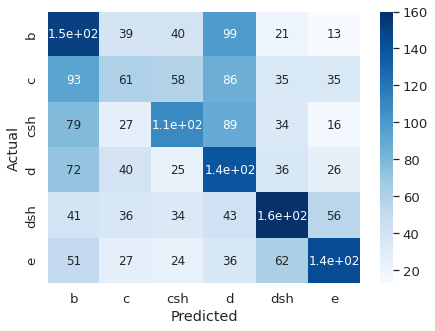

In [ ]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = np.unique(data_modif.tonic)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = classes, index = classes)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
plt.figure(figsize = (7, 5))
sns.set(font_scale = 1.2)
sns.heatmap(conf_mat, cmap = "Blues", annot_kws = {"size": 12}, annot = True);

## Supervised learning approach (Neural Network)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Let's start by splitting our data 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# ..and apply normalisation
scaler = StandardScaler().fit(X_train_val)
norm_x_train_val = scaler.transform(X_train_val)
norm_x_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
y_train_val_onehot = onehot_encoder.fit_transform(y_train_val.reshape(len(y_train_val), 1))
y_test_onehot = onehot_encoder.fit_transform(y_test.reshape(len(y_test), 1))
print("One-hot encoded y_train_val shape = ", y_train_val_onehot.shape)
print("One-hot encoded y_test shape = ", y_test_onehot.shape)

One-hot encoded y_train_val shape =  (5179, 6)
One-hot encoded y_test shape =  (1295, 6)


In [ ]:
from keras.models import Sequential
from keras import layers

'''
Keras is a library built on top of TensorFlow 2
https://keras.io/guides/sequential_model/

A Sequential model is appropriate for a plain stack of layers
where each layer has exactly one input tensor and one output tensor.
'''

def compose_model(num_features):
    
    model = Sequential()
    # HERE I MADE SOME CHANGES TO THE NUMBER OF NEURONS IN LAYER 1 and 2
    # THE NUMBER OF NEURONS IN LAYER 1 ARE EQUAL TO THE NUMBER OF TONAL FEATURES (25)

    # Input layer 
    model.add(layers.BatchNormalization(name='InputLayer', input_shape=(num_features,)))
    
    # 1. hidden layer
    model.add(layers.Dense(name='HiddenLayer_1', units = 12)) # approximately a half neurons than input layer
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('tanh'))
    model.add(layers.Dropout(0.3))

    '''
    # If every layer halves the number of neurons of the preceeding layer, we should not have this hidden layer in this model
    # 2. hidden layer
    model.add(layers.Dense(name='HiddenLayer_2', units = 15))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    '''

    # Output layer
    # THIS HAS BEEN MODIFIED BECAUSE WE HAVE 6 LABELS (tonics) RATHER THAN 10 (strokes)
    model.add(layers.Dense(name='Output_layer', units = 6))
    model.add(layers.Activation('sigmoid'))
    
    return model

model = compose_model(X_train_val.shape[1])

In [ ]:
model.summary()  # Plot summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (BatchNormalizat  (None, 24)               96        
 ion)                                                            
                                                                 
 HiddenLayer_1 (Dense)       (None, 25)                625       
                                                                 
 batch_normalization_4 (Batc  (None, 25)               100       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 25)                0         
                                                                 
 dropout_4 (Dropout)         (None, 25)                0         
                                                                 
 HiddenLayer_2 (Dense)       (None, 15)               

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
summary = model.fit(X_train_val, y_train_val_onehot, batch_size = 50, epochs = 250, validation_split=0.2, verbose=0)

In [ ]:
score = model.evaluate(X_test, y_test_onehot, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

'''
DATA WITH LOW LEVEL FEATURES (MUCH BETER THAN THIS ONE, which uses tonic features);
Test loss: 0.19820061326026917
Test accuracy: 0.7312741279602051
'''

Test loss: 0.38967135548591614
Test accuracy: 0.3922779858112335


'\nDATA WITH LOW LEVEL FEATURES (MUCH BETER THAN THIS ONE, which uses tonic features);\nTest loss: 0.19820061326026917\nTest accuracy: 0.7312741279602051\n'

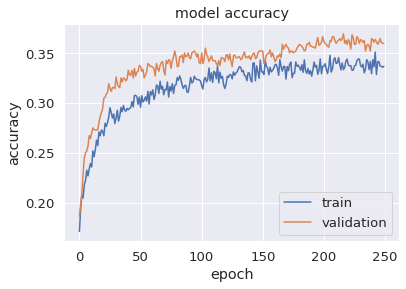

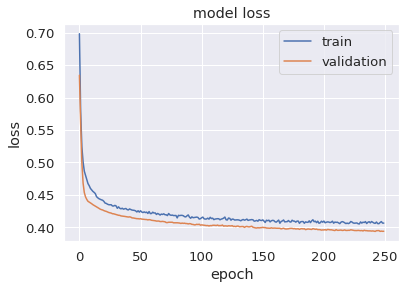

In [ ]:
# summarize history for accuracy
plt.plot(summary.history['accuracy'])
plt.plot(summary.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(summary.history['loss'])
plt.plot(summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()